In [2]:
import matplotlib.pyplot as plt
import numpy as np

image = plt.imread('/Users/yangyongze/projects/image_quantization/workspace/images/3/cityu.jpg')  # (1154, 802, 4)
height = image.shape[0]  # rows
width = image.shape[1]  # columns
pixels = height * width
if image.shape[2] == 4:
    image = image[:, :, :3]

unique_colors, counts = np.unique(image.reshape(-1, 3), axis=0, return_counts=True)

print(pixels)
print(len(unique_colors))

print(image[0][0])

600600
24064
[255 255 255]


In [4]:
from pyspark.ml.clustering import GaussianMixture

In [3]:
from pyspark.sql import SparkSession
import os
os.environ['SPARK_HOME'] = 'spark-3.5.1-bin-hadoop3'
os.environ['HADOOP_HOME'] = 'hadoop-3.3.6'
spark = SparkSession.builder.appName("KMeansExample").getOrCreate()


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/04/28 15:21:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler

image = plt.imread('/Users/yangyongze/projects/image_quantization/workspace/images/3/cityu.jpg')  # (1154, 802, 4)
if image.shape[2] == 4:
    image = image[:, :, :3]
image = image.reshape(-1, 3)
data_df = spark.createDataFrame(image.tolist(), ["feature1", "feature2", "feature3"])
assembler = VectorAssembler(inputCols=["feature1", "feature2", "feature3"], outputCol="features")
data_df = assembler.transform(data_df)


In [4]:
# 训练K-Means模型
kmeans = KMeans().setK(5).setMaxIter(1)  # 设置簇的数量
model = kmeans.fit(data_df)

# 获取聚类中心
centers = model.clusterCenters()
print("K-Means聚类中心:")
for center in centers:
    print(center)

24/04/27 22:53:53 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS


K-Means聚类中心:
[254.77881959 254.69410339 254.59810034]
[194.18487879  25.72609787  65.07986583]
[181.85182746  95.29980244  83.00082318]
[216.64787221  85.61954146  48.80545953]
[238.26652195 191.66714906 184.55885191]


In [5]:
predictions = model.transform(data_df)


0
(600600, 3)


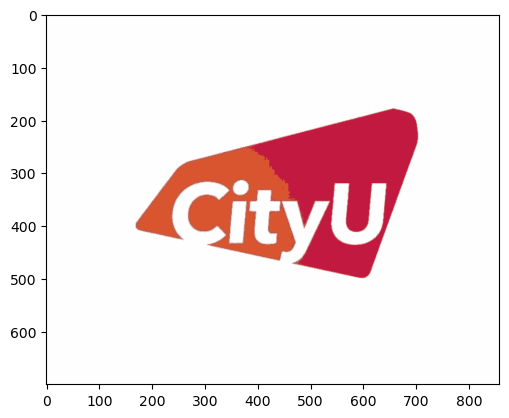

(700, 858, 3)


In [14]:
cluster_indices = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
print(cluster_indices[0])
processed_data = np.array([centers[i] for i in cluster_indices])

# 打印 processed_data
print(processed_data.shape)
reshaped_array = processed_data.reshape(height, width, 3)

plt.imshow(reshaped_array.astype(np.int64))
plt.show()
print(reshaped_array.shape)

In [15]:
from PIL import Image
new_image = Image.fromarray(reshaped_array)
new_image.save('a.png')


TypeError: Cannot handle this data type: (1, 1, 3), <f8

In [5]:
from pyspark.ml.clustering import GaussianMixture

# 创建GMM模型
gmm = GaussianMixture().setK(3).setMaxIter(1)  # 设置高斯分布的数量
model = gmm.fit(data_df)

# 获取聚类中心
centers = model.gaussiansDF
print("GMM聚类中心:")
centers.show()

24/04/28 15:22:38 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
24/04/28 15:22:41 WARN InstanceBuilder: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


GMM聚类中心:
+--------------------+--------------------+
|                mean|                 cov|
+--------------------+--------------------+
|[254.837569732661...|0.699327707475645...|
|[218.631875254772...|302.8755618734245...|
|[200.014267740475...|389.9099938503137...|
+--------------------+--------------------+



In [13]:
centers_array =np.array(centers.select("mean").collect()).reshape(3,3)
print(centers_array)

[[254.83756973 254.5743983  254.45800563]
 [218.63187525 112.64117802 108.89088899]
 [200.01426774  52.04226059  64.79989284]]


In [14]:
predictions = model.transform(data_df)


(600600, 3)


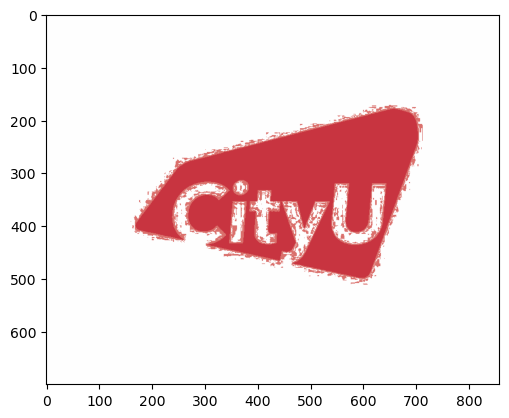

(700, 858, 3)


In [17]:
cluster_indices = predictions.select("prediction").rdd.flatMap(lambda x: x).collect()
processed_data = np.array([centers_array[i] for i in cluster_indices])

# 打印 processed_data
print(processed_data.shape)
reshaped_array = processed_data.reshape(height, width, 3)

plt.imshow(reshaped_array.astype(np.int64))
plt.show()
print(reshaped_array.shape)

In [6]:
from pyspark.ml.clustering import BisectingKMeans

# 创建BisectingKMeans模型
bkm = BisectingKMeans().setK(16)  # 设置簇的数量
model = bkm.fit(data_df)

# 获取聚类中心
centers = model.clusterCenters()
print("Bisecting K-Means聚类中心:")
for center in centers:
    print(center)

24/04/27 08:44:37 WARN TaskSetManager: Stage 31 contains a task of very large size (3287 KiB). The maximum recommended task size is 1000 KiB.
24/04/27 08:44:37 WARN TaskSetManager: Stage 32 contains a task of very large size (3287 KiB). The maximum recommended task size is 1000 KiB.
24/04/27 08:44:39 WARN TaskSetManager: Stage 34 contains a task of very large size (3287 KiB). The maximum recommended task size is 1000 KiB.
24/04/27 08:44:41 WARN TaskSetManager: Stage 36 contains a task of very large size (3287 KiB). The maximum recommended task size is 1000 KiB.
24/04/27 08:44:42 WARN TaskSetManager: Stage 38 contains a task of very large size (3287 KiB). The maximum recommended task size is 1000 KiB.
24/04/27 08:44:44 WARN TaskSetManager: Stage 40 contains a task of very large size (3287 KiB). The maximum recommended task size is 1000 KiB.
24/04/27 08:44:44 WARN TaskSetManager: Stage 42 contains a task of very large size (3287 KiB). The maximum recommended task size is 1000 KiB.
24/04/

Bisecting K-Means聚类中心:
[0.00551575 0.00551575 0.00551575]
[0.08495185 0.08495185 0.08495185]
[0.17444079 0.17444079 0.17443938]
[0.29610261 0.23886208 0.27151373]
[0.3727283  0.36211807 0.45303732]
[0.61580271 0.1612554  0.37017741]
[0.5591959  0.55181314 0.61323908]
[0.77412533 0.42457289 0.5684983 ]
[0.71384158 0.65655877 0.70543466]
[0.75874196 0.72599044 0.75741649]
[0.81678403 0.78275254 0.81262182]
[0.86831282 0.84570445 0.86689407]
[0.91613084 0.89887594 0.91619023]
[0.95239196 0.94605917 0.95357306]
[0.98162296 0.98071982 0.97936044]
[0.99997836 0.99997065 0.99997085]


In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.ml.linalg import Vectors
from pyspark.sql.window import Window
from pyspark.sql import functions as F

def euclidean_distance(point1, point2):
    return float(Vectors.dense(point1).squared_distance(Vectors.dense(point2)))

os.environ['SPARK_HOME'] = 'spark-3.5.1-bin-hadoop3'
os.environ['HADOOP_HOME'] = 'hadoop-3.3.6'

centroids_df = centers
data_df = image

spark = SparkSession.builder.appName("DistanceCalculation").getOrCreate()
data_df = spark.createDataFrame([(Vectors.dense(row),) for row in data_df.tolist()], ["data_point"])
centroids_df = spark.createDataFrame([(Vectors.dense(row),) for row in centroids_df], ["centroid_point"])

euclidean_distance_udf = udf(euclidean_distance, DoubleType())
result_df = data_df.crossJoin(centroids_df).withColumn("distance", euclidean_distance_udf("data_point", "centroid_point"))

min_distance_df = result_df.withColumn("min_distance", F.min("distance").over(Window.partitionBy("data_point")))
assigned_centroid_df = min_distance_df.filter(min_distance_df["distance"] == min_distance_df["min_distance"]).select("data_point", "centroid_point")

new_triplets_df = assigned_centroid_df.toPandas()
new_triplets_df["centroid_point"] = new_triplets_df["centroid_point"].apply(lambda x: x.toArray())
new_triplets_array = np.stack(new_triplets_df["centroid_point"].values)

spark.stop()

print(new_triplets_array.shape)

24/04/27 22:39:50 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
24/04/27 22:39:56 WARN TaskSetManager: Stage 16 contains a task of very large size (2929 KiB). The maximum recommended task size is 1000 KiB.


(600600, 3)


[190.94586842  21.35413158  67.12321053]


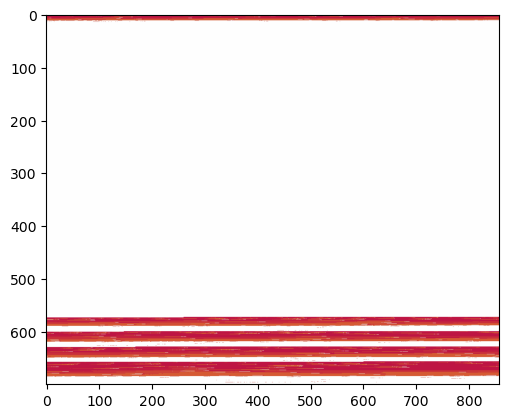

(700, 858, 3)


In [8]:
print(new_triplets_array[0])
reshaped_array = new_triplets_array.reshape(height, width, 3)

plt.imshow(reshaped_array.astype(np.int64))
plt.show()
print(reshaped_array.shape)

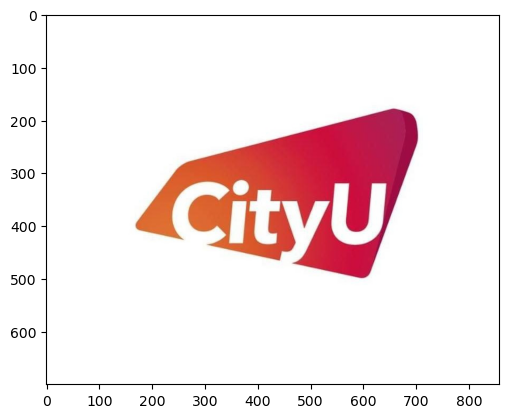

(700, 858, 3)


In [9]:
reshaped_image = image.reshape(height, width, 3)

plt.imshow(reshaped_image.astype(np.int64))
plt.show()
print(reshaped_array.shape)

In [18]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType
from pyspark.ml.linalg import Vectors
from pyspark.sql.window import Window
from pyspark.sql import functions as F

def euclidean_distance(point1, point2):
    return float(Vectors.dense(point1).squared_distance(Vectors.dense(point2)))

os.environ['SPARK_HOME'] = 'spark-3.5.1-bin-hadoop3'
os.environ['HADOOP_HOME'] = 'hadoop-3.3.6'

print(image.shape)
centroids_df = centers
data_df = image

spark = SparkSession.builder.appName("DistanceCalculation").getOrCreate()
data_df = spark.createDataFrame([(Vectors.dense(row),) for row in data_df.tolist()], ["data_point"])
centroids_df = spark.createDataFrame([(Vectors.dense(row),) for row in centroids_df], ["centroid_point"])

euclidean_distance_udf = udf(euclidean_distance, DoubleType())
result_df = data_df.crossJoin(centroids_df).withColumn("distance", euclidean_distance_udf("data_point", "centroid_point"))

min_distance_df = result_df.withColumn("min_distance", F.min("distance").over(Window.partitionBy("data_point")))
assigned_centroid_df = min_distance_df.filter(min_distance_df["distance"] == min_distance_df["min_distance"]).select("data_point", "centroid_point")
new_triplets_df = assigned_centroid_df.withColumnRenamed("data_point", "new_data_point").withColumnRenamed("centroid_point", "new_centroid_point")

new_triplets_array = new_triplets_df["new_centroid_point"].apply(lambda x: x.toArray()).values
spark.stop()

print(new_triplets_array.shape)

TypeError: 'Column' object is not callable